# RELATION BETWEEN COVID-19 AND COUNTRIES 
<font color = "blue">
Content:

1. [Data Preparation](#1)

1. [Outlier Detection](#2)

1. [Per Capita Income of First and Last 10 Countries](#3)

1. [Income Group By Region](#4)

1. [Relation Between ;](#5)
     
    * GDP per capita (current US$)
 
    * Confirmed
 
    * Population age distribution (0-14, %)
 
    * Population age distribution (60+ years, %)

1. [Relation Between Death/Recovered Percent and Region](#13)

1. [Relation Between Recovered/Death Percent and Region](#6)

1. [Heatmap](#7)

1. [Linear Regression](#8)

1. [Multiple Linear Regression](#9)

1. [Polynomial Regression](#10)
 
1. [Random Forest Regression](#11)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)

from collections import Counter
from sklearn.linear_model import LinearRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/undata-country-profiles/country_profile_variables.csv
/kaggle/input/undata-country-profiles/kiva_country_profile_variables.csv
/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


## Data Preparation
<a id = "1">  </a>

In [2]:
country_data = pd.read_csv("../input/undata-country-profiles/country_profile_variables.csv")
corona_data = pd.read_csv("../input/corona-virus-report/country_wise_latest.csv")

In [3]:
country_data = country_data[["country", "Region","Population density (per km2, 2017)", "GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)", "Population age distribution (0-14 / 60+ years, %)"]]
country_data.columns

Index(['country', 'Region', 'Population density (per km2, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP per capita (current US$)',
       'Population age distribution (0-14 / 60+ years, %)'],
      dtype='object')

In [4]:
corona_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
country_data.head()

,country,Region,"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),"Population age distribution (0-14 / 60+ years, %)"
0,Afghanistan,SouthernAsia,54.4,20270,623.2,43.2/4.1
1,Albania,SouthernEurope,106.9,11541,3984.2,17.4/19.0
2,Algeria,NorthernAfrica,17.3,164779,4154.1,29.3/9.4
3,American Samoa,Polynesia,278.2,-99,-99.0,33.3/9.0
4,Andorra,SouthernEurope,163.8,2812,39896.4,14.4/19.0


In [6]:
corona_data = corona_data[["Country/Region", "Confirmed", "Deaths", "Recovered"]]
corona_data.rename(columns = {"Country/Region" : "country"}, inplace  = True)

In [7]:
df = pd.merge(country_data, corona_data, on = "country").reset_index()
df.drop(columns = "index", inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            166 non-null    object 
 1   Region                                             166 non-null    object 
 2   Population density (per km2, 2017)                 166 non-null    float64
 3   GDP: Gross domestic product (million current US$)  166 non-null    int64  
 4   GDP per capita (current US$)                       166 non-null    float64
 5   Population age distribution (0-14 / 60+ years, %)  166 non-null    object 
 6   Confirmed                                          166 non-null    int64  
 7   Deaths                                             166 non-null    int64  
 8   Recovered                                          166 non-null    int64  
dtypes: float64(

In [9]:
df_ = (df["Population age distribution (0-14 / 60+ years, %)"].str.split("[/]", expand = True))

In [10]:
df = pd.concat([df_, df], axis = 1)
df.drop(columns = "Population age distribution (0-14 / 60+ years, %)", inplace = True)
df.rename(columns = {0 : "Population age distribution (0-14, %)", 1 : "Population age distribution (60+ years, %)"}, inplace  = True)
df

,"Population age distribution (0-14, %)","Population age distribution (60+ years, %)",country,Region,"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Confirmed,Deaths,Recovered
0,43.2,4.1,Afghanistan,SouthernAsia,54.4,20270,623.2,36263,1269,25198
1,17.4,19.0,Albania,SouthernEurope,106.9,11541,3984.2,4880,144,2745
2,29.3,9.4,Algeria,NorthernAfrica,17.3,164779,4154.1,27973,1163,18837
3,14.4,19.0,Andorra,SouthernEurope,163.8,2812,39896.4,907,52,803
4,46.8,4.0,Angola,MiddleAfrica,23.9,117955,4714.1,950,41,242
...,...,...,...,...,...,...,...,...,...,...
161,28.0,7.6,Uzbekistan,CentralAsia,75.0,69004,2308.3,21209,121,11674
162,28.1,5.4,Western Sahara,NorthernAfrica,2.1,-99,-99.0,10,1,8
163,39.9,4.6,Yemen,WesternAsia,53.5,29688,1106.4,1691,483,833
164,44.8,3.7,Zambia,EasternAfrica,23.0,21255,1311.1,4552,140,2815


In [11]:
df = df.iloc[:,[2,3,4,5,6,7,8,9,0,1]]

In [12]:
df

,country,Region,"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Confirmed,Deaths,Recovered,"Population age distribution (0-14, %)","Population age distribution (60+ years, %)"
0,Afghanistan,SouthernAsia,54.4,20270,623.2,36263,1269,25198,43.2,4.1
1,Albania,SouthernEurope,106.9,11541,3984.2,4880,144,2745,17.4,19.0
2,Algeria,NorthernAfrica,17.3,164779,4154.1,27973,1163,18837,29.3,9.4
3,Andorra,SouthernEurope,163.8,2812,39896.4,907,52,803,14.4,19.0
4,Angola,MiddleAfrica,23.9,117955,4714.1,950,41,242,46.8,4.0
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,CentralAsia,75.0,69004,2308.3,21209,121,11674,28.0,7.6
162,Western Sahara,NorthernAfrica,2.1,-99,-99.0,10,1,8,28.1,5.4
163,Yemen,WesternAsia,53.5,29688,1106.4,1691,483,833,39.9,4.6
164,Zambia,EasternAfrica,23.0,21255,1311.1,4552,140,2815,44.8,3.7


## Outlier Detection
<a id = "2"> </a>

In [13]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            166 non-null    object 
 1   Region                                             166 non-null    object 
 2   Population density (per km2, 2017)                 166 non-null    float64
 3   GDP: Gross domestic product (million current US$)  166 non-null    int64  
 4   GDP per capita (current US$)                       166 non-null    float64
 5   Confirmed                                          166 non-null    int64  
 6   Deaths                                             166 non-null    int64  
 7   Recovered                                          166 non-null    int64  
 8   Population age distribution (0-14, %)              166 non-null    object 
 9   Population

In [15]:
df.loc[detect_outliers(df,["Population density (per km2, 2017)","GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)","Confirmed","Deaths", "Recovered"])]

,country,Region,"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Confirmed,Deaths,Recovered,"Population age distribution (0-14, %)","Population age distribution (60+ years, %)"
13,Bangladesh,SouthernAsia,1265.0,194466,1207.9,226225,2965,125683,28.4,7.3
109,Netherlands,WesternEurope,505.2,750318,44332.1,53413,6160,189,16.4,25.0
6,Argentina,SouthAmerica,16.2,632343,14564.5,167416,3059,72575,24.9,15.4
22,Brazil,SouthAmerica,25.0,1772591,8528.3,2442375,87618,1846641,21.7,12.6
29,Canada,NorthernAmerica,4.0,1552808,43205.6,116458,8944,0,16.0,23.5
33,China,EasternAsia,150.1,11158457,8109.1,86783,4656,78869,17.7,16.2
54,France,WesternEurope,118.7,2418946,36304.2,220352,30212,81212,18.1,25.7
58,Germany,WesternEurope,235.6,3363600,41686.2,207112,9125,190314,13.1,28.0
72,India,SouthernAsia,450.4,2116239,1614.2,1480073,33408,951166,27.8,9.4
77,Italy,SouthernEurope,201.8,1821580,30462.4,246286,35112,198593,13.5,29.4


In [16]:
while len(df.loc[detect_outliers(df,["Population density (per km2, 2017)","GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)","Confirmed","Deaths", "Recovered"])].index):
    df = df.drop(detect_outliers(df,["Population density (per km2, 2017)","GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)","Confirmed","Deaths", "Recovered"])).reset_index(drop = True)

In [17]:
df.loc[detect_outliers(df,["Population density (per km2, 2017)","GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)","Confirmed","Deaths", "Recovered"])]

,country,Region,"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Confirmed,Deaths,Recovered,"Population age distribution (0-14, %)","Population age distribution (60+ years, %)"


## Per Capita Income of First and Last 10 Countries
<a id = "3">  </a>

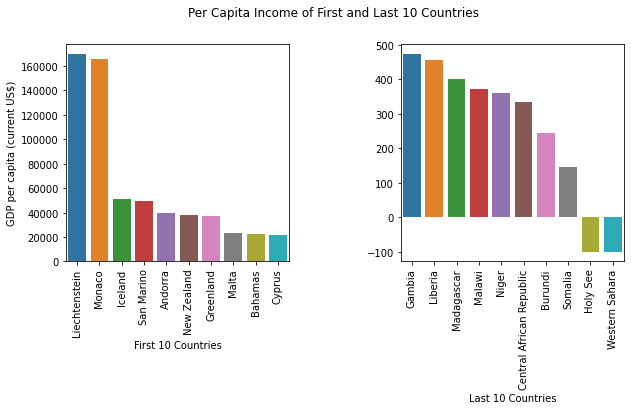

In [18]:
sorted_data = pd.DataFrame(df.sort_values(ascending = False, by ="GDP per capita (current US$)"))

fig, ax =plt.subplots(1,2, figsize = (10, 4))
fig.subplots_adjust(wspace=0.500)

sns.barplot(data = sorted_data, x = sorted_data['country'][:10], y = "GDP per capita (current US$)", ax = ax[0])
ax[0].set_xlabel("First 10 Countries")
ax[0].set_xticklabels(sorted_data["country"][:10].values, rotation = 90)

sns.barplot(data = sorted_data, x = sorted_data['country'][-10:],  y = "GDP per capita (current US$)", ax = ax[1])
ax[1].set_xlabel("Last 10 Countries")
ax[1].set_xticklabels(sorted_data["country"][-10:].values, rotation = 90)
ax[1].set_ylabel("")

plt.title("Per Capita Income of First and Last 10 Countries", x = -0.3, y = 1.1)
plt.show()

## Income Group By Region
<a id = "4">  </a>

In [19]:
df["Region"].value_counts()

EasternAfrica        15
WesternAfrica        12
Caribbean            11
SouthernEurope       10
MiddleAfrica          6
WesternAsia           5
SouthAmerica          4
NorthernEurope        4
SouthernAsia          4
South-easternAsia     3
SouthernAfrica        3
CentralAmerica        3
NorthernAfrica        3
Melanesia             2
EasternEurope         2
WesternEurope         2
NorthernAmerica       1
EasternAsia           1
Oceania               1
CentralAsia           1
Name: Region, dtype: int64

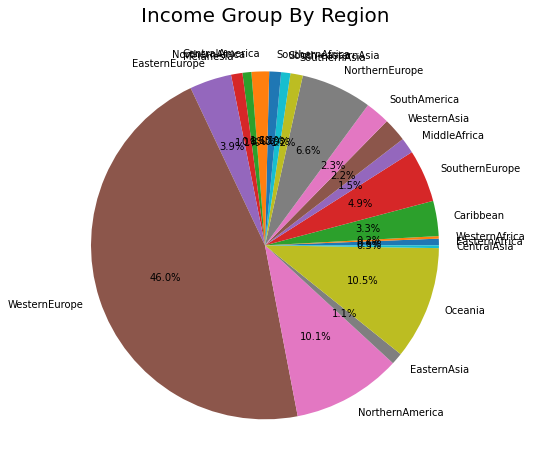

In [20]:
labels = df.Region.value_counts().index
sizes = []

for i in labels:
    avg_in = (df[df["Region"] == i]["GDP per capita (current US$)"].values.sum())/(df[df["Region"] == i]["country"].count())
    sizes.append(avg_in)

fig, ax = plt.subplots(figsize = (8,8))
explode = np.zeros(len(labels))

plt.pie(sizes , explode = explode, labels = labels, autopct = "%.1f%%")
plt.title("Income Group By Region", fontsize=20)
plt.show()

In [21]:
labels = df.Region.value_counts().index
sizes = []

for i in labels:
    avg_in = (df[df["Region"] == i]["GDP per capita (current US$)"].values.sum())/(df[df["Region"] == i]["country"].count())
    sizes.append(avg_in)

fig = {
    "data" : [
        {
            "values" : sizes,
            "labels" : labels,
            "domain": {"x" : [0, .5]},
            "name"   : "Income Group By Region",
            "hoverinfo" : "label+percent+name",
            "hole"   : .2,
            "type"   : "pie"
        }
    ],
    "layout" : {
        "title" : "",
        "annotations": [
            {
                "font" : {"size" : 17},
                "showarrow" : False,
                "text" : "Income Group By Region",
                "x" : .15,
                "y" : 1.2
            },
        ]
    }
}


iplot(fig)

## Relation Between ;
<a id = "5">  </a>
GDP per capita (current US$)

Confirmed

Population age distribution (0-14, %)

Population age distribution (60+ years, %)

In [22]:
df_comp = df.loc[:,["GDP per capita (current US$)", "Confirmed", "Population age distribution (0-14, %)", "Population age distribution (60+ years, %)"]]
df_comp.drop(index = df_comp[df_comp["Population age distribution (60+ years, %)"] == "..."].index, inplace = True)
df_comp.drop(index = df_comp[df_comp["Population age distribution (0-14, %)"] == "..."].index, inplace = True)

df_comp = df_comp.astype({"Population age distribution (0-14, %)": "float","Population age distribution (60+ years, %)" : "float" })
df_comp["index"] = np.arange(1,len(df_comp)+1)

fig = ff.create_scatterplotmatrix(df_comp, diag = "box",  colormap = "Blues", index = "index", colormap_type = "cat", height = 700, width = 700)

iplot(fig)

## Relation Between Death/Recovered Percent and Region
<a id = "6">  </a>

In [23]:
labelsReg_Rec = df.Region.value_counts().index
sizesReg_Rec = []

for i in labelsReg_Rec:
    avg_Reg_Rec = (df[df["Region"] == i]["Deaths"].values.sum())/(df[df["Region"] == i]["Recovered"].count())
    sizesReg_Rec.append(avg_Reg_Rec)

fig = {
    "data" : [
        {
            "values" : sizesReg_Rec,
            "labels" : labelsReg_Rec,
            "domain": {"x" : [0, .5]},
            "name"   : "Death/Recovered Percent",
            "hoverinfo" : "label+percent+name",
            "hole"   : .2,
            "type"   : "pie"
        }
    ],
    "layout" : {
        "title" : "",
        "annotations": [
            {
                "font" : {"size" : 17},
                "showarrow" : False,
                "text" : "Relation Between Death/Recovered Percent and Region",
                "x" : .05,
                "y" : 1.2
            },
        ]
    }
}


iplot(fig)

## Relation Between Recovered/Death Percent and Region
<a id = "13">  </a>

In [24]:
labelsRec_Reg = df.Region.value_counts().index
sizesRec_Reg = []

for i in labelsRec_Reg:
    avg_Rec_Reg = (df[df["Region"] == i]["Recovered"].values.sum())/(df[df["Region"] == i]["Deaths"].count())
    sizesRec_Reg.append(avg_Rec_Reg)

fig = {
    "data" : [
        {
            "values" : sizesRec_Reg,
            "labels" : labelsRec_Reg,
            "domain": {"x" : [0, .5]},
            "name"   : "Recovered/Death Percent",
            "hoverinfo" : "label+percent+name",
            "hole"   : .2,
            "type"   : "pie"
        }
    ],
    "layout" : {
        "title" : "",
        "annotations": [
            {
                "font" : {"size" : 17},
                "showarrow" : False,
                "text" : "Relation Between Recovered/Death Percent and Region",
                "x" : .05,
                "y" : 1.2
            },
        ]
    }
}


iplot(fig)

## Heatmap for Understanding Relation Between ;
<a id = "7">  </a>
Population Density (per km2, 2017)

GDP per capita (current US$)

Confirmed

Deaths

Recovered

Population age distribution (0-14, %)

Population age distribution (60+ years, %)

In [25]:
# Dropping data and converting to float type on selected columns as we did before

df_comp = df.copy()
df_comp.drop(index = df_comp[df_comp["Population age distribution (60+ years, %)"] == "..."].index, inplace = True)
df_comp.drop(index = df_comp[df_comp["Population age distribution (0-14, %)"] == "..."].index, inplace = True)

df_comp = df_comp.astype({"Population age distribution (0-14, %)": "float","Population age distribution (60+ years, %)" : "float" })

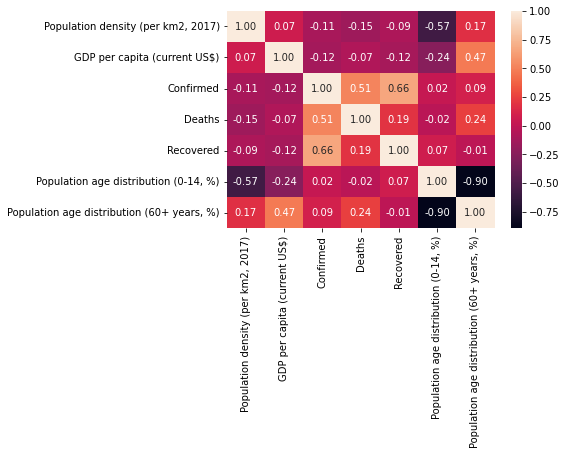

In [26]:
list1 = ["Population density (per km2, 2017)", "GDP per capita (current US$)","Confirmed","Deaths", "Recovered", "Population age distribution (0-14, %)", "Population age distribution (60+ years, %)"]
sns.heatmap(df_comp[list1].corr(), annot = True, fmt = ".2f")

plt.show()

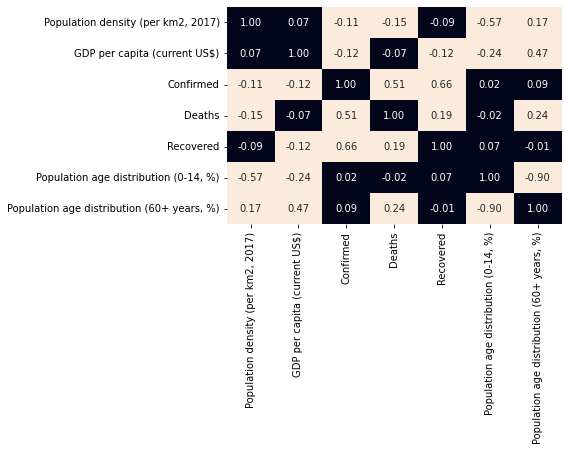

In [27]:
thr = 0.1
corrb = df_comp[list1].corr()
corrd = (corrb.values < -thr) | (corrb.values > thr)&  (corrb.values != 1)

sns.heatmap(corrd, annot = df_comp[list1].corr(), fmt = ".2f", xticklabels = list1, yticklabels = list1, cbar = False)
plt.show()

## Linear Regression
<a id = "8">  </a>

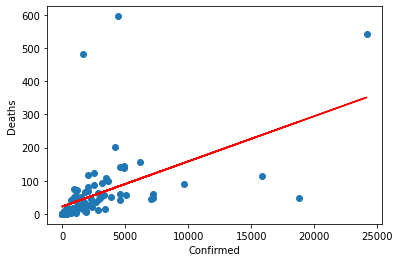

r_score:  0.2647254136067657


In [28]:
from sklearn.metrics import r2_score

plt.scatter(df_comp.Confirmed, df_comp.Deaths)
plt.xlabel("Confirmed")
plt.ylabel("Deaths")

lr = LinearRegression()
x = df_comp.Confirmed.values.reshape(-1, 1)
y = df_comp.Deaths.values.reshape(-1, 1)

lr.fit(x, y)

y_head = lr.predict(x)
plt.plot(x, y_head, color = "red")

plt.show()

print("r_score: ", r2_score(y,y_head))

In [29]:
df

,country,Region,"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),GDP per capita (current US$),Confirmed,Deaths,Recovered,"Population age distribution (0-14, %)","Population age distribution (60+ years, %)"
0,Albania,SouthernEurope,106.9,11541,3984.2,4880,144,2745,17.4,19.0
1,Andorra,SouthernEurope,163.8,2812,39896.4,907,52,803,14.4,19.0
2,Angola,MiddleAfrica,23.9,117955,4714.1,950,41,242,46.8,4.0
3,Antigua and Barbuda,Caribbean,231.8,1356,14764.5,86,3,65,23.9,10.9
4,Bahamas,Caribbean,39.5,8854,22817.2,382,11,91,20.5,13.5
...,...,...,...,...,...,...,...,...,...,...
88,Uruguay,SouthAmerica,19.8,53442,15573.8,1202,35,951,21.1,19.5
89,Western Sahara,NorthernAfrica,2.1,-99,-99.0,10,1,8,28.1,5.4
90,Yemen,WesternAsia,53.5,29688,1106.4,1691,483,833,39.9,4.6
91,Zambia,EasternAfrica,23.0,21255,1311.1,4552,140,2815,44.8,3.7


## Multiple Linear Regression
<a id = "9">  </a>

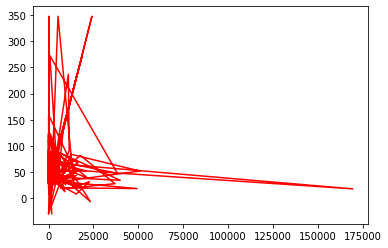

r_score:  0.2739308950340872


In [30]:
from sklearn.metrics import r2_score

x = df_comp.iloc[:,[2,4,5]].values
y = df_comp.Deaths.values.reshape(-1, 1)


mlr = LinearRegression()
mlr.fit(x,y)

y_head = mlr.predict(x)


plt.plot(x, y_head, color = "red")

plt.show()


print("r_score: ", r2_score(y,y_head))


## Polynomial Regression
<a id = "10">  </a>

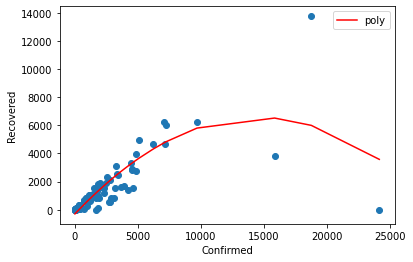

r_score:  -0.6494048595903754


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


x = df_comp.Confirmed.values.reshape(-1, 1)
y = df_comp.Recovered.values.reshape(-1, 1)

plt.scatter(x, y)
plt.xlabel("Confirmed")
plt.ylabel("Recovered")

pr = PolynomialFeatures(degree = 2)

x_p = pr.fit_transform(x)
linear_regression = LinearRegression()
linear_regression.fit(x_p, y)


y_head = linear_regression.predict(x_p)

import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_head), key=sort_axis)
x, y_head = zip(*sorted_zip)

plt.plot(x, y_head, color = "red", label = "poly")
plt.legend()
plt.show()

print("r_score: ", r2_score(y,y_head))

## Random Forest Regression
<a id = "11">  </a>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



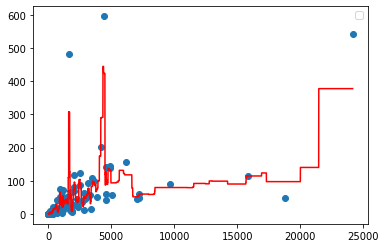

In [32]:
from sklearn.ensemble import RandomForestRegressor

x = df_comp.Confirmed.values.reshape(-1, 1)
y = df_comp.Deaths.values.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x, y)

x_ = np.arange(min(x), max(x), 0.01).reshape(-1, 1)
y_head = rf.predict(x_)

plt.scatter(x, y)
plt.plot(x_, y_head, color = "red")
plt.legend()
plt.show()